### Utils

In [2]:
import inspect


def raven_post(payload):
    """
    Sends a payload to a TGI endpoint.
    """
    # Now, let's prompt Raven!
    API_URL = "http://nexusraven.nexusflow.ai"
    headers = {"Content-Type": "application/json"}
    import requests

    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()


def call_functioncalling_llm(prompt, api_to_call):
    """
    This function sends a request to the TGI endpoint to get Raven's function call.
    This will not generate Raven's justification and reasoning for the call, to save on latency.
    """
    signature = inspect.signature(api_to_call)
    docstring = api_to_call.__doc__
    prompt = f'''Function:\n{api_to_call.__name__}{signature}\n"""{clean_docstring(docstring)}"""\n\n\nUser Query:{prompt}<human_end>'''
    import requests

    output = raven_post(
        {
            "inputs": prompt,
            "parameters": {
                "temperature": 0.001,
                "stop": ["<bot_end>"],
                "do_sample": False,
                "max_new_tokens": 2048,
                "return_full_text": False,
            },
        }
    )
    call = output[0]["generated_text"].replace("Call:", "").strip()
    return call


def query_raven(prompt):
    """
    This function sends a request to the TGI endpoint to get Raven's function call.
    This will not generate Raven's justification and reasoning for the call, to save on latency.
    """
    import requests

    output = raven_post(
        {
            "inputs": prompt,
            "parameters": {
                "temperature": 0.001,
                "stop": ["<bot_end>"],
                "return_full_text": False,
                "do_sample": False,
                "max_new_tokens": 2048,
            },
        }
    )
    call = output[0]["generated_text"].replace("Call:", "").strip()
    return call


def clean_docstring(docstring):
    if docstring is not None:
        # Remove leading and trailing whitespace
        docstring = docstring.strip()
    return docstring


def build_raven_prompt(function_list, user_query):
    import inspect

    raven_prompt = ""
    for function in function_list:
        signature = inspect.signature(function)
        docstring = function.__doc__
        prompt = f'''
Function:
def {function.__name__}{signature}
    """
    {clean_docstring(docstring)}
    """
    
'''
        raven_prompt += prompt

    raven_prompt += f"User Query: {user_query}<human_end>"
    return raven_prompt

In [4]:
from matplotlib import pyplot as plt


def plot_some_points(x: list, y: list):
    """
    Plots some points!
    """
    plt.plot(x, y)
    plt.show()

Matplotlib is building the font cache; this may take a moment.


In [5]:
USER_QUERY = "Hey can you plot y=10x where x=1, 2, 3 for me?"

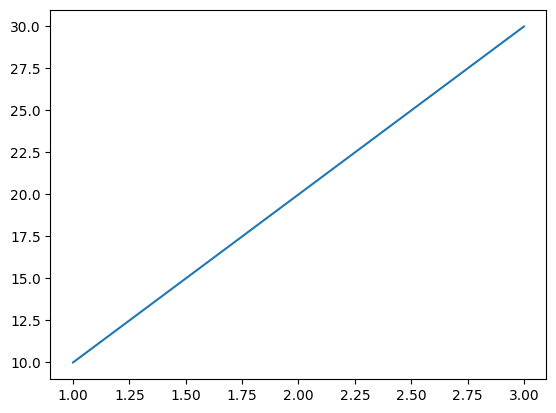

In [6]:
plot_some_points(x=[1, 2, 3], y=[10, 20, 30])

In [7]:
prompt = f'''
Function:
def plot_some_points(x : list, y : list):
  """
  Plots some points!
  """
  plt.plot(x, y)
  plt.show()

User Query: {USER_QUERY}<human_end>
'''

In [9]:
function_call = query_raven(prompt)

In [10]:
print (function_call)

plot_some_points(x=[1, 2, 3], y=[10, 20, 30])


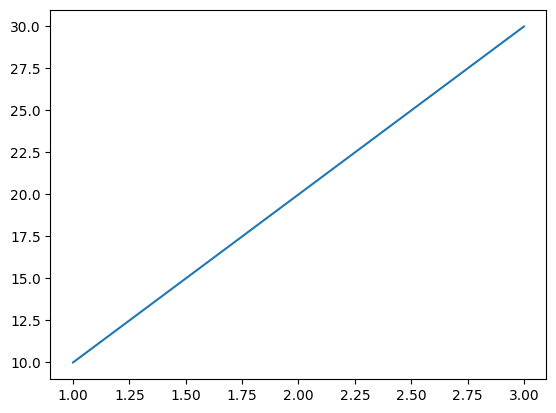

In [11]:
exec(function_call)

In [16]:
USER_QUERY = "Hey can you plot y=x^2 where x=0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5 for me?"

In [17]:
prompt = \
f'''
Function:
def plot_some_points(x : list, y : list):
  """
  Plots some points!
  """
  plt.plot(x, y)
  plt.show()

User Query: {USER_QUERY}<human_end>
'''

function_call = query_raven(prompt)

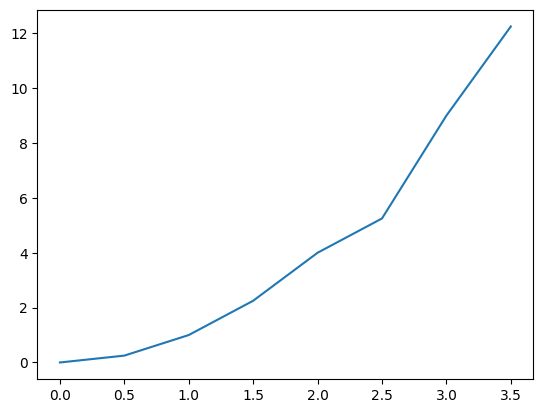

In [18]:
exec(function_call)

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def draw_clown_face(face_color="yellow", eye_color="black", nose_color="red"):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face. Default is 'yellow'.
    - eye_color (str): Color of the clown's eyes. Default is 'black'.
    - nose_color (str): Color of the clown's nose. Default is 'red'.

    This function creates a plot displaying a simplified clown face, where essential facial features' size, position, and color can be customized.
    """
    # Constants
    face_radius = 0.4
    nose_radius = 0.1
    nose_x, nose_y = 0.5, 0.5
    mouth_x, mouth_y = 0.5, 0.3
    mouth_color = "black"
    eye_size = 0.05
    mouth_size = (0.3, 0.1)
    eye_offset = (0.15, 0.15)
    mouth_theta = (200, 340)

    fig, ax = plt.subplots()
    # Face
    face = patches.Circle((0.5, 0.5), face_radius, color=face_color, fill=True)
    ax.add_patch(face)
    # Eyes
    eye_left = patches.Circle(
        (0.5 - eye_offset[0], 0.5 + eye_offset[1]), eye_size, color=eye_color, fill=True
    )
    eye_right = patches.Circle(
        (0.5 + eye_offset[0], 0.5 + eye_offset[1]), eye_size, color=eye_color, fill=True
    )
    ax.add_patch(eye_left)
    ax.add_patch(eye_right)
    # Nose
    nose = patches.Circle((nose_x, nose_y), nose_radius, color=nose_color, fill=True)
    ax.add_patch(nose)
    # Mouth
    mouth = patches.Arc(
        (mouth_x, mouth_y),
        mouth_size[0],
        mouth_size[1],
        angle=0,
        theta1=mouth_theta[0],
        theta2=mouth_theta[1],
        color=mouth_color,
        linewidth=2,
    )
    ax.add_patch(mouth)
    # Setting aspect ratio to 'equal' to ensure the face is circular
    ax.set_aspect("equal")
    # Remove axes
    ax.axis("off")
    plt.show()

In [19]:
USER_QUERY = "Hey can you draw a pink clown face with a red nose"

raven_prompt = '''
Function:
def draw_clown_face(face_color='yellow', 
                    eye_color='black',
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face.
    - eye_color (str): Color of the clown's eyes.
    - nose_color (str): Color of the clown's nose.
    """

User Query: {query}<human_end>
'''
raven_prompt_with_query = raven_prompt.format(query=USER_QUERY)

In [20]:
print (raven_prompt_with_query)


Function:
def draw_clown_face(face_color='yellow', 
                    eye_color='black',
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face.
    - eye_color (str): Color of the clown's eyes.
    - nose_color (str): Color of the clown's nose.
    """

User Query: Hey can you draw a pink clown face with a red nose<human_end>



In [22]:
raven_call = query_raven(raven_prompt_with_query)
print (raven_call)

draw_clown_face(face_color='pink', nose_color='red')


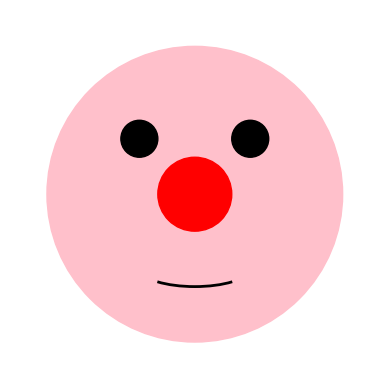

In [28]:
exec(raven_call)

draw_clown_face(face_color='red', eye_color='blue', nose_color='green')


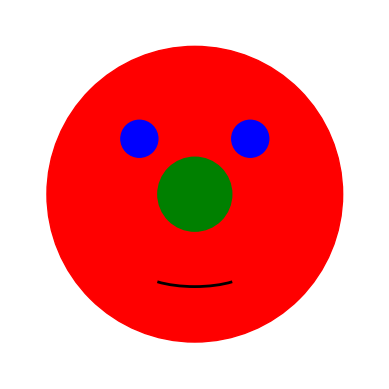

In [30]:
USER_QUERY = ""
raven_prompt_with_query = raven_prompt.format(query=USER_QUERY)

raven_call = query_raven(raven_prompt_with_query)
print (raven_call)
exec(raven_call)

In [31]:
import json
from openai import OpenAI
from dotenv import load_dotenv
import os

_ = load_dotenv()


def query_openai(msg, functions=None):
    load_dotenv()
    GPT_MODEL = "gpt-3.5-turbo"

    openai_client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])
    openai_response = openai_client.chat.completions.create(
        model=GPT_MODEL, messages=[{"role": "user", "content": msg}], tools=functions
    )
    return openai_response

In [34]:
openai_function = {
  "type": "function",
  "function": {
    "name": "draw_clown_face",
    "description": "Draws a customizable, simplified clown face using matplotlib.",
    "parameters": {
      "type": "object",
      "properties": {
        "face_color": {
          "type": "string",
          "description": "Color of the clown's face."
        },
        "eye_color": {
          "type": "string",
          "description": "Color of the clown's eyes."
        },
        "nose_color": {
          "type": "string",
          "description": "Color of the clown's nose."
        }
        }
      }
    }
  }

openai_msg = \
"Hey can you draw a pink clown face with a red nose"

In [35]:
result = query_openai(openai_msg, functions=[openai_function])

In [36]:
print (result.choices[0].message.tool_calls[0].function)

Function(arguments='{"face_color": "pink", "eye_color": "black", "nose_color": "red"}', name='draw_clown_face')


In [39]:
tool_name = result.choices[0].message.tool_calls[0].function.name
tool_args = result.choices[0].message.tool_calls[0].function.arguments


In [40]:
function_call = f"{tool_name}(**{tool_args})"

In [41]:
function_call = f"{tool_name}(**{tool_args})"

In [42]:
print (function_call)

draw_clown_face(**{"face_color": "pink", "eye_color": "black", "nose_color": "red"})


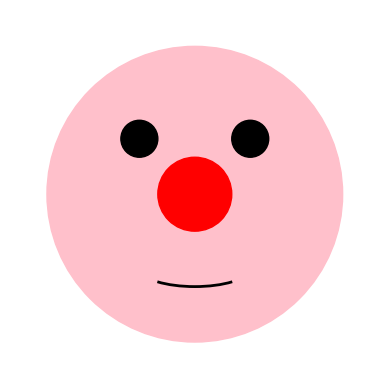

In [43]:
exec(function_call)